In [1]:
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt


In [2]:
X = pd.read_csv("../Data/X_processed.csv")
y = pd.read_csv("../Data/y.csv").squeeze()

print(X.shape)
print(y.value_counts())


(614, 16)
Risk
0    422
1    192
Name: count, dtype: int64


In [3]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    stratify=y,
    random_state=42
)


In [4]:
with open("../model/credit_risk_model.pkl", "rb") as f:
    model = pickle.load(f)


In [5]:
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]


In [6]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

print("Accuracy :", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall   :", recall_score(y_test, y_pred))
print("F1 Score :", f1_score(y_test, y_pred))


Accuracy : 0.8048780487804879
Precision: 0.71875
Recall   : 0.6052631578947368
F1 Score : 0.6571428571428571


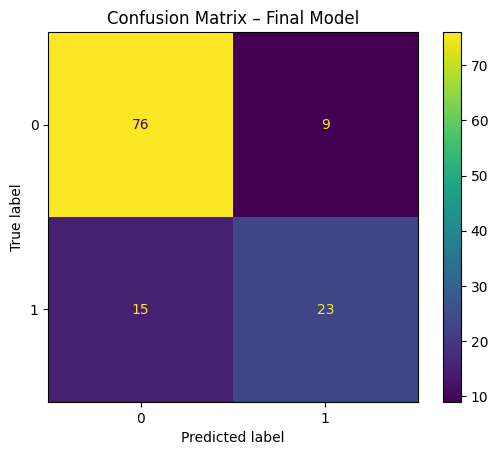

In [7]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(cm)
disp.plot()
plt.title("Confusion Matrix – Final Model")
plt.show()


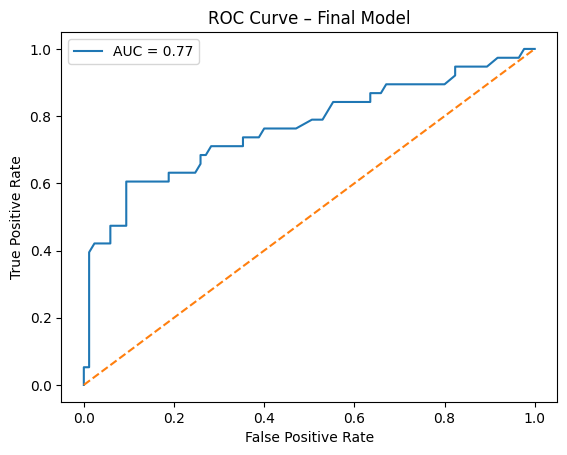

In [8]:
from sklearn.metrics import roc_curve, roc_auc_score

fpr, tpr, _ = roc_curve(y_test, y_prob)
auc = roc_auc_score(y_test, y_prob)

plt.plot(fpr, tpr, label=f"AUC = {auc:.2f}")
plt.plot([0,1], [0,1], linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve – Final Model")
plt.legend()
plt.show()


In [9]:
importances = model.feature_importances_
features = X.columns

feat_imp = pd.DataFrame({
    "Feature": features,
    "Importance": importances
}).sort_values(by="Importance", ascending=False)

feat_imp.head(10)


,Feature,Importance
4,Credit_History,0.239594
6,Debt_Income_Ratio,0.122436
2,LoanAmount,0.112288
0,ApplicantIncome,0.107610
5,Total_Income,0.107484
1,CoapplicantIncome,0.072942
14,Property_Area_Semiurban,0.052931
8,Married_Yes,0.043802
3,Loan_Amount_Term,0.026793
15,Property_Area_Urban,0.020837
